## Neural Network - Multiclass Classification

### This example shows use of sparse_categorical_crossentropy loss function
### With this loss function, you don't have to one hot encode labels

### Build the Neural Network using Keras - Easy and Portable across different implementations  

https://keras.io/  

For building on TensorFlow - Use a conda_tensorflow_py36 or equivalent kernel  
For building on Apache MxNet  - Use a conda_mxnet_py36 or equivalent kernel  

### Iris Plant Classification  

<h4>Input Features:</h4>  
sepal_length, sepal_width, petal_length, petal_width  

<h4>Target:</h4>  
Iris Class ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  

In [1]:
# https://keras.io/
# https://github.com/keras-team/keras/issues/2743
# Change Kernel to use Tensor Flow. For example: conda_tensorflow_p36
import sys
import numpy as np
# Set random seed
np.random.seed(0)

import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, KBinsDiscretizer, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

Using TensorFlow backend.


In [2]:
column_list_file = 'iris_train_column_list.txt'
train_file = 'iris_train.csv'
validation_file = 'iris_validation.csv'

In [3]:
columns = ''
with open(column_list_file,'r') as f:
    columns = f.read().split(',')

In [4]:
columns

['encoded_class', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [5]:
# Encode Class Labels to integers
# Labeled Classes
labels=[0,1,2]
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
le = preprocessing.LabelEncoder()
le.fit(classes)

LabelEncoder()

In [6]:
# Specify the column names as the file does not have column header
df_train = pd.read_csv(train_file,names=columns)
df_validation = pd.read_csv(validation_file,names=columns)

In [7]:
df_train.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,3.9,1.2
1,2,6.1,2.6,5.6,1.4
2,2,5.8,2.8,5.1,2.4
3,0,4.4,3.2,1.3,0.2
4,2,7.2,3.6,6.1,2.5


In [8]:
dt_train_no_head = pd.read_csv(train_file,header=None).head()

In [9]:
dt_train_no_head.iloc[:,0].values

array([1, 2, 2, 0, 2])

In [10]:
df_train.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,3.9,1.2
1,2,6.1,2.6,5.6,1.4
2,2,5.8,2.8,5.1,2.4
3,0,4.4,3.2,1.3,0.2
4,2,7.2,3.6,6.1,2.5


In [11]:
df_validation.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,4.1,1.0
1,0,4.8,3.4,1.6,0.2
2,1,6.0,2.2,4.0,1.0
3,2,6.4,3.1,5.5,1.8
4,2,6.7,2.5,5.8,1.8


In [12]:
df_train['encoded_class'].head()

0    1
1    2
2    2
3    0
4    2
Name: encoded_class, dtype: int64

In [13]:
X_train = df_train.iloc[:,1:].values # Features: 1st column onwards 
y_train = df_train.iloc[:,0].values

X_validation = df_validation.iloc[:,1:].values
y_validation = df_validation.iloc[:,0].values

## Build Model using Keras  
Reference: https://keras.io/getting-started/sequential-model-guide/  

In [14]:
# Create Model
# 1 hidden layer with 32 neurons with relu activation
# output layer - multi-class classification with 3 classes
# Use softmax activation - gives the probability of a sample belonging to the three classes
#  select the one with highest probability
#  Sum of the probabilities is 1.

# optimizer - use adam or rmsprop
# loss function - multinomial logistic loss function - called as categorical cross entropy in keras
# metrics - additional metrics to report
model = Sequential()
model.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [16]:
# Train the model, iterating on the data in batches of 32 samples
history = model.fit(X_train, y_train, epochs=300, batch_size=32,
         validation_data=(X_validation,y_validation),callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 105 samples, validate on 45 samples
Epoch 1/300





105/105 [==============================] - 1s 6ms/step - loss: 2.5314 - acc: 0.3048 - val_loss: 1.8562 - val_acc: 0.4000
Epoch 2/300
105/105 [==============================] - 0s 148us/step - loss: 2.0598 - acc: 0.3048 - val_loss: 1.6165 - val_acc: 0.4000
Epoch 3/300
105/105 [==============================] - 0s 144us/step - loss: 1.7888 - acc: 0.3048 - val_loss: 1.4342 - val_acc: 0.4000
Epoch 4/300
105/105 [==============================] - 0s 125us/step - loss: 1.5707 - acc: 0.3048 - val_loss: 1.3054 - val_acc: 0.4000
Epoch 5/300
105/105 [==============================] - 0s 116us/step - loss: 1.4069 - acc: 0.3048 - val_loss: 1.2252 - val_acc: 0.4000
Epoch 6/300
105/105 [==============================] - 0s 123us/step - loss: 1.2953 - acc: 0.3048 - val_loss: 1.1563 - val_acc: 0.4000
Epoch 7/300
105/105 [========================

105/105 [==============================] - 0s 104us/step - loss: 0.5529 - acc: 0.9238 - val_loss: 0.5211 - val_acc: 0.9333
Epoch 46/300
105/105 [==============================] - 0s 126us/step - loss: 0.5461 - acc: 0.9238 - val_loss: 0.4895 - val_acc: 0.9111
Epoch 47/300
105/105 [==============================] - 0s 114us/step - loss: 0.5348 - acc: 0.9238 - val_loss: 0.5009 - val_acc: 0.9333
Epoch 48/300
105/105 [==============================] - 0s 107us/step - loss: 0.5263 - acc: 0.9429 - val_loss: 0.5069 - val_acc: 0.8889
Epoch 49/300
105/105 [==============================] - 0s 125us/step - loss: 0.5180 - acc: 0.9238 - val_loss: 0.4745 - val_acc: 0.9556
Epoch 50/300
105/105 [==============================] - 0s 120us/step - loss: 0.5135 - acc: 0.9429 - val_loss: 0.4969 - val_acc: 0.8667
Epoch 51/300
105/105 [==============================] - 0s 123us/step - loss: 0.5062 - acc: 0.9143 - val_loss: 0.4612 - val_acc: 0.9556
Epoch 52/300
105/105 [==============================] - 0s 12

Epoch 165/300
105/105 [==============================] - 0s 122us/step - loss: 0.1570 - acc: 0.9810 - val_loss: 0.1396 - val_acc: 0.9556
Epoch 166/300
105/105 [==============================] - 0s 122us/step - loss: 0.1559 - acc: 0.9810 - val_loss: 0.1395 - val_acc: 0.9556
Epoch 167/300
105/105 [==============================] - 0s 124us/step - loss: 0.1528 - acc: 0.9810 - val_loss: 0.1376 - val_acc: 0.9556
Epoch 168/300
105/105 [==============================] - 0s 111us/step - loss: 0.1583 - acc: 0.9810 - val_loss: 0.1527 - val_acc: 0.9556
Epoch 169/300
105/105 [==============================] - 0s 130us/step - loss: 0.1548 - acc: 0.9714 - val_loss: 0.1421 - val_acc: 0.9778
Epoch 170/300
105/105 [==============================] - 0s 127us/step - loss: 0.1514 - acc: 0.9810 - val_loss: 0.1445 - val_acc: 0.9778
Epoch 171/300
105/105 [==============================] - 0s 117us/step - loss: 0.1503 - acc: 0.9810 - val_loss: 0.1357 - val_acc: 0.9556
Epoch 172/300
105/105 [==================

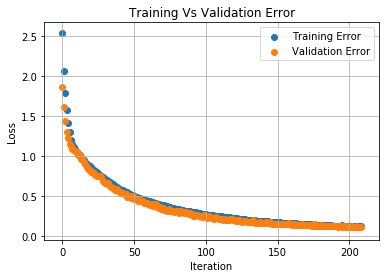

In [17]:
plt.scatter(x=history.epoch,y=history.history['loss'],label='Training Error')
plt.scatter(x=history.epoch,y=history.history['val_loss'],label='Validation Error')
plt.grid(True)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

In [18]:
df = pd.read_csv(validation_file,names=columns)

In [19]:
df.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width
0,1,5.8,2.7,4.1,1.0
1,0,4.8,3.4,1.6,0.2
2,1,6.0,2.2,4.0,1.0
3,2,6.4,3.1,5.5,1.8
4,2,6.7,2.5,5.8,1.8


In [20]:
X_test = df.iloc[:,1:].values
print(X_test[:5])

[[5.8 2.7 4.1 1. ]
 [4.8 3.4 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 3.1 5.5 1.8]
 [6.7 2.5 5.8 1.8]]


In [21]:
result = model.predict(X_test)

In [22]:
# Probability of a sample belonging to the three classes
# Sample can belong to only class and the sum of the three probabilities is 1.
np.set_printoptions(suppress=True)
result[:5]

array([[0.0027694 , 0.97066444, 0.02656613],
       [0.9931972 , 0.00680049, 0.00000242],
       [0.00148231, 0.9460273 , 0.05249051],
       [0.00000566, 0.22368866, 0.77630574],
       [0.00000016, 0.04726679, 0.9527331 ]], dtype=float32)

In [23]:
# reset print options
np.set_printoptions()

In [24]:
df['predicted_class'] = np.argmax(result,axis=1)

In [25]:
df.head()

,encoded_class,sepal_length,sepal_width,petal_length,petal_width,predicted_class
0,1,5.8,2.7,4.1,1.0,1
1,0,4.8,3.4,1.6,0.2,0
2,1,6.0,2.2,4.0,1.0,1
3,2,6.4,3.1,5.5,1.8,2
4,2,6.7,2.5,5.8,1.8,2


<h2>Confusion Matrix</h2>
Confusion Matrix is a table that summarizes performance of classification model.<br><br>

In [26]:
# Reference: 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
    #    print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [27]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(df['encoded_class'],
                              df['predicted_class'],labels=labels)

In [28]:
cnf_matrix

array([[16,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 18]])

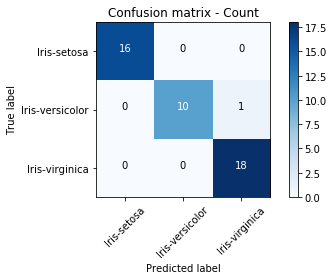

In [29]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix - Count')

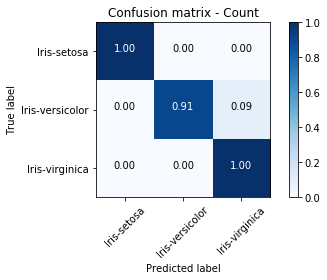

In [30]:
# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes,
                      title='Confusion matrix - Count',normalize=True)

In [31]:
print(classification_report(
    df['encoded_class'],
    df['predicted_class'],
    labels=labels,
    target_names=classes))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

